In [1]:
# Library Manipulasi Data
import pandas as pd
import numpy as np

# Library untuk Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Library Praproses Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
dataset = pd.read_csv("../Dataset/Cryptocurrency-BTC-USD-2024-05.csv", parse_dates=['Date'])
dataset = dataset.set_index("Date")
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2024-05-27,68512.179688,70597.882813,68232.500000,69394.554688,69394.554688,25870990717
2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906


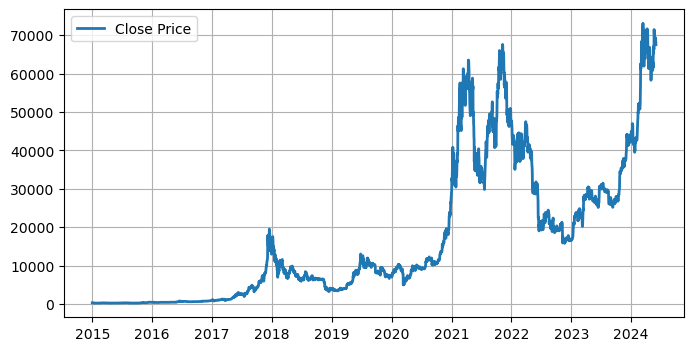

In [3]:
# Create Frame
fig, ax = plt.subplots(figsize = (8,4))

# Time Series Plot
ax.plot(dataset.index.values, dataset["Close"], color="tab:blue", label="Close Price", linewidth=2)

# Set Nilai Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

In [4]:
# Normalize Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(dataset))

In [5]:
df_normalized = pd.concat([
    pd.DataFrame(dataset.index, columns=["Date"]),
    pd.DataFrame(scaled, columns=["Open", "high", "Low", "Close", "Adj Close", "Volume"])
], axis=1)
df_normalized.tail()

,Date,Open,high,Low,Close,Adj Close,Volume
3434,2024-05-27,0.937352,0.957135,0.956415,0.949401,0.949401,0.073693
3435,2024-05-28,0.949423,0.942405,0.942288,0.934336,0.934336,0.093214
3436,2024-05-29,0.934391,0.933401,0.940522,0.924486,0.924486,0.076075
3437,2024-05-30,0.924512,0.942213,0.940755,0.935279,0.935279,0.084060
3438,2024-05-31,0.935299,0.935401,0.933945,0.923297,0.923297,0.078013


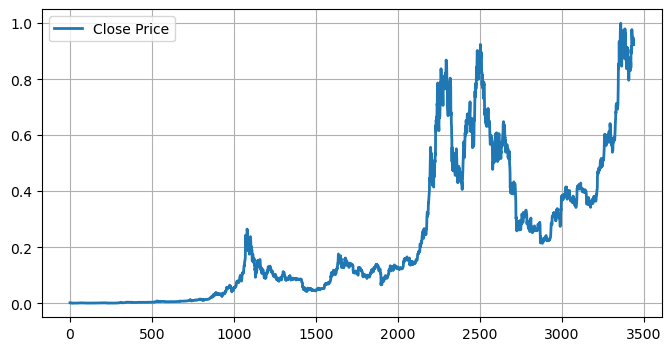

In [6]:
# Create Frame
fig, ax = plt.subplots(figsize = (8,4))

# Time Series Plot
ax.plot(df_normalized.index.values, df_normalized["Close"], color="tab:blue", label="Close Price", linewidth=2)

# Set Nilai Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

In [7]:
# Split Data Train & Test
train_data, test_data = train_test_split(df_normalized, train_size=0.80, test_size=0.20, shuffle=False)

<function matplotlib.pyplot.show(close=None, block=None)>

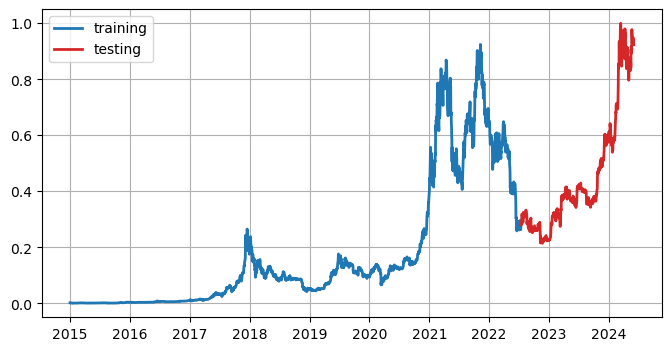

In [13]:
# Create Figure
fig, ax = plt.subplots(figsize = (8,4))

# Create Time Series Plot
ax.plot(
    df_normalized["Date"].iloc[0:len(train_data)], train_data["Close"],
    color="tab:blue", label="training", linewidth=2
)
ax.plot(
    df_normalized["Date"].iloc[len(train_data):], test_data["Close"],
    color="tab:red", label="testing", linewidth=2
)

# Set Labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# SHow Plot
plt.show